## Objectives

- Review CRISP-DM model
- Practice running a classifcation model

___
# CRISP-DM Model

What are the major phases ?

___
### - Business Understanding
Why am I looking at this data set?  
What am I trying to answer?  
How does this data help me answer my question?  
___

### - Data Understanding and Data Preparation
Where are the missing values?  
What do the columns mean?  
How do I decide on what new columns to make?  
___

### - Modeling and Evaluation

How well did my model do?  
Which metric am I using to evaluate my model?  
What can I change to increase my scoring metric?
___

### - Deployment

Who is this going to?  
Where do I need to document better?  
Which areas are unclear?  
What can I do better?   
___

At what stages would the following methods be used?
- `StandardScaler()`
- `train_test_split()`
- `auc()`
- `pd.dropna()`

# Time to Code

In [2]:
import pandas as pd
import numpy as np
import glob
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno



This [data](https://www.kaggle.com/jolasa/bay-area-bike-sharing-trips) is taken from Kaggle. This dataset contains anonymized trips data of Lyft bike sharing system(Bay Wheels), in the Bay Area from January 2019 to May 2019.

![bikes](pics/bikes.jpg) ![the wiggle](pics/wiggle.png)

### -Business Understanding-

We want to discover if we can predict ____ with ____
___

In [3]:
csv_list = glob.glob("data/*.csv")

list_of_dfs = []

for csv in csv_list:
    df = pd.read_csv(csv, index_col=None, header=0)
    list_of_dfs.append(df)

In [4]:
bike_df = pd.concat(list_of_dfs)
bike_df.head()

,month,trip_duration_sec,start_station_id,start_station_name,end_station_id,end_station_name,bike_id,user_type,member_birth_year,member_gender
0,April,50305,368.0,Myrtle St at Polk St,324.0,Union Square (Powell St at Post St),2749,Subscriber,1989.0,Female
1,April,53725,246.0,Berkeley Civic Center,241.0,Ashby BART Station,2608,Customer,NaN,NaN
2,April,78072,64.0,5th St at Brannan St,64.0,5th St at Brannan St,258,Subscriber,1993.0,Male
3,April,78969,67.0,San Francisco Caltrain Station 2 (Townsend St...,89.0,Division St at Potrero Ave,1974,Subscriber,1972.0,Male
4,April,1128,124.0,19th St at Florida St,5.0,Powell St BART Station (Market St at 5th St),877,Subscriber,1973.0,Male


### - Data Understanding and Data Preparation -

We need to clean the data, look at NaN values, understand what the columns represent, etc.

In [5]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1053067 entries, 0 to 192081
Data columns (total 10 columns):
month                 1053067 non-null object
trip_duration_sec     1053067 non-null int64
start_station_id      1052322 non-null float64
start_station_name    1052322 non-null object
end_station_id        1052322 non-null float64
end_station_name      1052322 non-null object
bike_id               1053067 non-null int64
user_type             1053067 non-null object
member_birth_year     1003691 non-null float64
member_gender         1003697 non-null object
dtypes: float64(3), int64(2), object(5)
memory usage: 88.4+ MB


___
Are there missing values?  
___

In [6]:
bike_df.isna().sum()

month                     0
trip_duration_sec         0
start_station_id        745
start_station_name      745
end_station_id          745
end_station_name        745
bike_id                   0
user_type                 0
member_birth_year     49376
member_gender         49370
dtype: int64

### Plug for `missingno`
[missingno](https://github.com/ResidentMario/missingno) is a library to visualize "missing data" in python.

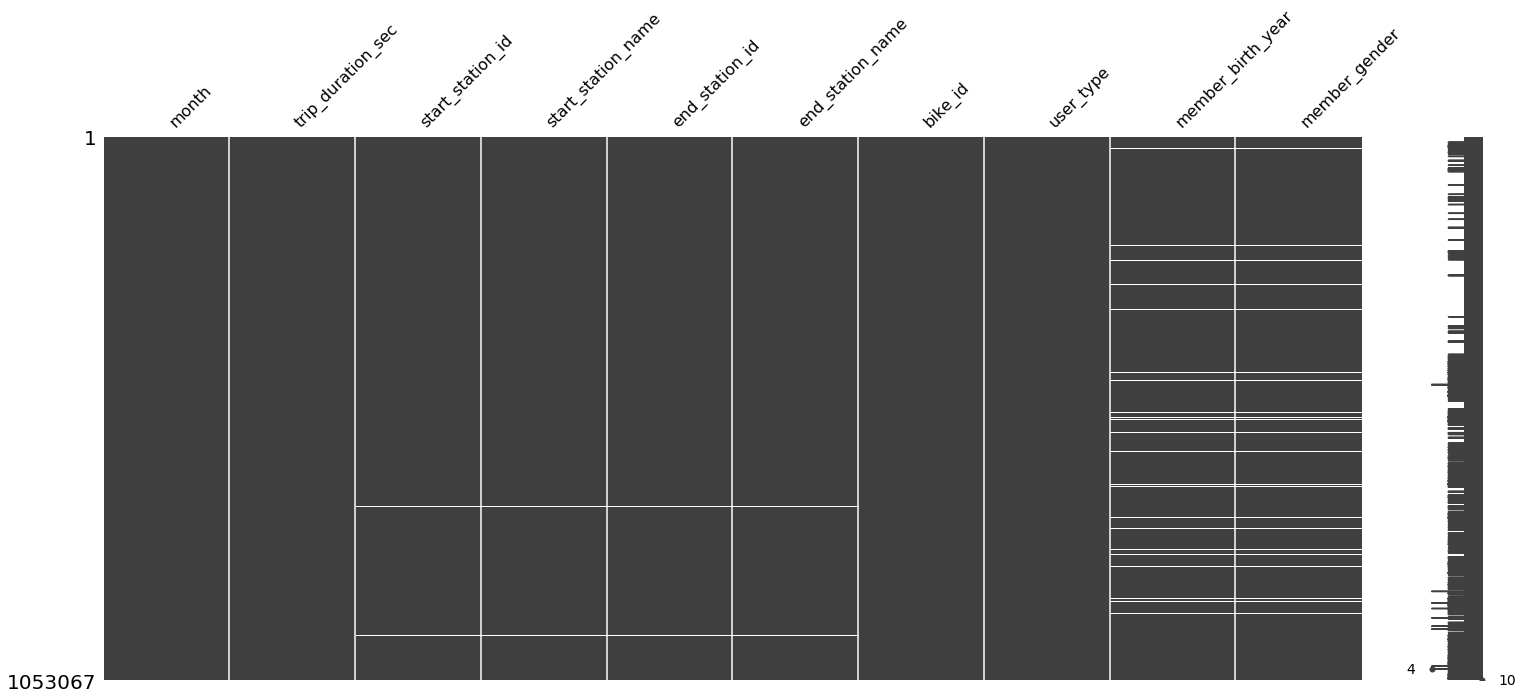

In [7]:
msno.matrix(bike_df)

## What could cause these two columns (member_birth_year and member_gender) to be missing?

In [8]:
bike_df.user_type.value_counts()

Subscriber    911465
Customer      141602
Name: user_type, dtype: int64

In [9]:
bike_df[pd.isnull(bike_df).any(axis=1)].head(20)

,month,trip_duration_sec,start_station_id,start_station_name,end_station_id,end_station_name,bike_id,user_type,member_birth_year,member_gender
1,April,53725,246.0,Berkeley Civic Center,241.0,Ashby BART Station,2608,Customer,NaN,NaN
60,April,1179,121.0,Mission Playground,44.0,Civic Center/UN Plaza BART Station (Market St ...,1851,Customer,NaN,NaN
62,April,1176,121.0,Mission Playground,44.0,Civic Center/UN Plaza BART Station (Market St ...,2706,Customer,NaN,NaN
81,April,246,5.0,Powell St BART Station (Market St at 5th St),58.0,Market St at 10th St,1417,Subscriber,NaN,NaN
91,April,7058,134.0,Valencia St at 24th St,121.0,Mission Playground,2375,Customer,NaN,NaN
97,April,294,171.0,Rockridge BART Station,170.0,Telegraph Ave at 58th St,1787,Subscriber,NaN,NaN
111,April,735,345.0,Hubbell St at 16th St,60.0,8th St at Ringold St,2826,Customer,NaN,NaN
114,April,235,121.0,Mission Playground,121.0,Mission Playground,2706,Customer,NaN,NaN
119,April,852,243.0,Bancroft Way at College Ave,267.0,Derby St at College Ave,3349,Customer,NaN,NaN
139,April,427,72.0,Page St at Scott St,74.0,Laguna St at Hayes St,2148,Subscriber,NaN,NaN


## What to do?

What percentage of our data is missing?

In [10]:
bike_df.isna().sum()

month                     0
trip_duration_sec         0
start_station_id        745
start_station_name      745
end_station_id          745
end_station_name        745
bike_id                   0
user_type                 0
member_birth_year     49376
member_gender         49370
dtype: int64

In [11]:
#1053067

In [12]:
bike_df = bike_df.dropna(axis=0)

In [13]:
bike_df.isna().sum()

month                 0
trip_duration_sec     0
start_station_id      0
start_station_name    0
end_station_id        0
end_station_name      0
bike_id               0
user_type             0
member_birth_year     0
member_gender         0
dtype: int64

___
Are there redunant columns?  
What ones should I keep?  
___

In [14]:
bike_df = bike_df.drop(['start_station_name', 'end_station_name'], axis = 1)
bike_df.head()

,month,trip_duration_sec,start_station_id,end_station_id,bike_id,user_type,member_birth_year,member_gender
0,April,50305,368.0,324.0,2749,Subscriber,1989.0,Female
2,April,78072,64.0,64.0,258,Subscriber,1993.0,Male
3,April,78969,67.0,89.0,1974,Subscriber,1972.0,Male
4,April,1128,124.0,5.0,877,Subscriber,1973.0,Male
5,April,1388,243.0,247.0,3234,Customer,1997.0,Male


## Some more EDA

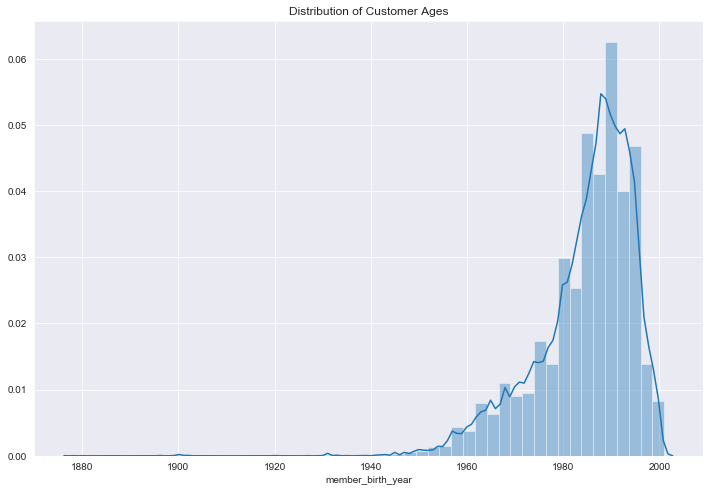

In [15]:
plt.figure(figsize = (12, 8))
sns.set_style('darkgrid')
sns.distplot(bike_df['member_birth_year'])
plt.title('Distribution of Customer Ages');

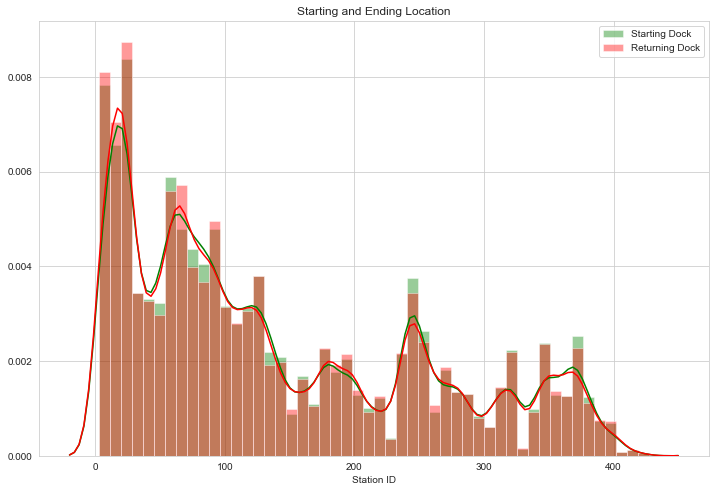

In [16]:
plt.figure(figsize = (12, 8))
sns.set_style('whitegrid')
sns.distplot(bike_df['start_station_id'], label='Starting Dock', color = 'g')
sns.distplot(bike_df['end_station_id'], label='Returning Dock', color='r')
plt.title('Starting and Ending Location')
plt.xlabel('Station ID')
plt.legend();

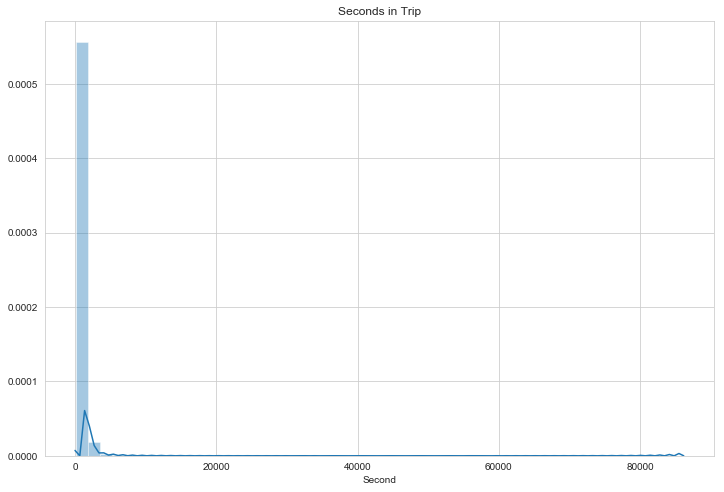

In [17]:
plt.figure(figsize = (12, 8))
sns.set_style('whitegrid')
sns.distplot(bike_df['trip_duration_sec'])
plt.xlabel('Second')
plt.title('Seconds in Trip');

In [18]:
bike_df.trip_duration_sec.nsmallest(10)

3986      61
26216     61
29070     61
40690     61
68049     61
86176     61
90150     61
100152    61
111048    61
118913    61
Name: trip_duration_sec, dtype: int64

In [19]:
bike_df.trip_duration_sec.nlargest(10)

12667     86114
70083     85496
30881     84967
230332    84908
223092    84792
84214     84782
126936    84746
85465     84548
226254    84241
85410     84002
Name: trip_duration_sec, dtype: int64

___
Lets turn the time into mins rather than seconds.

In [20]:
bike_df['trip_duration_min'] = (bike_df.trip_duration_sec / 60).round(2)
bike_df.head()

,month,trip_duration_sec,start_station_id,end_station_id,bike_id,user_type,member_birth_year,member_gender,trip_duration_min
0,April,50305,368.0,324.0,2749,Subscriber,1989.0,Female,838.42
2,April,78072,64.0,64.0,258,Subscriber,1993.0,Male,1301.20
3,April,78969,67.0,89.0,1974,Subscriber,1972.0,Male,1316.15
4,April,1128,124.0,5.0,877,Subscriber,1973.0,Male,18.80
5,April,1388,243.0,247.0,3234,Customer,1997.0,Male,23.13


In [21]:
bike_df.trip_duration_min.nsmallest(10)

3986      1.02
26216     1.02
29070     1.02
40690     1.02
68049     1.02
86176     1.02
90150     1.02
100152    1.02
111048    1.02
118913    1.02
Name: trip_duration_min, dtype: float64

In [22]:
bike_df.trip_duration_min.nlargest(10)

12667     1435.23
70083     1424.93
30881     1416.12
230332    1415.13
223092    1413.20
84214     1413.03
126936    1412.43
85465     1409.13
226254    1404.02
85410     1400.03
Name: trip_duration_min, dtype: float64

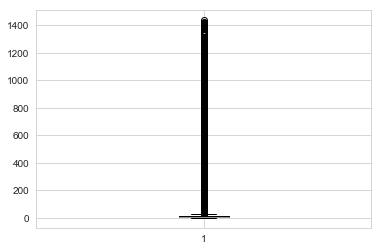

In [23]:
plt.boxplot(bike_df.trip_duration_min);

Fancy function to remove outliers using IQR. Not PEP 8.

In [45]:
def remove_outlier(df_in, col_names):
    df_out = df_in
    for col in col_names:
        q1 = df_in[col].quantile(0.25)
        q3 = df_in[col].quantile(0.75)
        iqr = q3-q1 #Interquartile range
        fence_low  = q1-1.5*iqr
        fence_high = q3+1.5*iqr
        df_out = df_in.loc[(df_in[col] > fence_low) & (df_in[col] < fence_high)]
    return df_out

In [46]:
slimmed_df = remove_outlier(bike_df, ["trip_duration_min"])

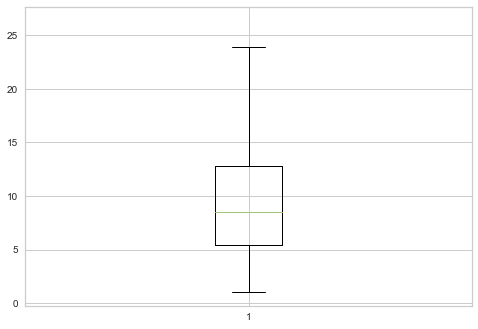

In [47]:
plt.boxplot(slimmed_df.trip_duration_min);

In [48]:
print(f"We went from {len(bike_df)} rows to a smaller {len(slimmed_df)} by removing the IQR in the duration column.")
print(f"That was a {round((len(bike_df) - len(slimmed_df)) / len(bike_df), 5)*100}% decrease in the number of rows.")

We went from 1002956 rows to a smaller 946842 by removing the IQR in the duration column.
That was a 5.595% decrease in the number of rows.


At this point we have a cleaned dataset. Depending on what we found during the EDA, or anything else that came up, we can take this in many directions. 


___
1. First we will try to predict if the member is a "brogrammer".  
2. Then we will attempt to predict the `user_type`.  
3. Finally, we'll see if anything exists to predict `month`.
___


### - Modeling and Evaluation -

Starting off with a simple model to give us a baseline. 

In [49]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

from sklearn.preprocessing import LabelEncoder

from yellowbrick.classifier import ROCAUC
from yellowbrick.classifier import ConfusionMatrix

import time

Everyone who is a male and lives in SF AND rides an electric bike is a Brogrammer.

In [50]:
def brogram(pd_series):
    if not "Male" in pd_series:
        return "Nice_person"
    else:
        return "Brogrammer"

In [51]:
df_1 = slimmed_df.copy()

In [52]:
df_1['bg'] = df_1.apply(lambda x: brogram(x['member_gender']), axis=1)

In [53]:
df_1 = df_1.drop('member_gender', axis=1)

In [54]:
df_1.bg.value_counts(normalize=True)

Brogrammer     0.746334
Nice_person    0.253666
Name: bg, dtype: float64

In [55]:
df_1 = pd.get_dummies(df_1, columns=['month', 'user_type'])
df_1.head()

,trip_duration_sec,start_station_id,end_station_id,bike_id,member_birth_year,trip_duration_min,bg,month_April,month_Februrary,month_January,month_March,month_May,user_type_Customer,user_type_Subscriber
4,1128,124.0,5.0,877,1973.0,18.80,Brogrammer,1,0,0,0,0,0,1
5,1388,243.0,247.0,3234,1997.0,23.13,Brogrammer,1,0,0,0,0,1,0
6,920,202.0,220.0,3262,1976.0,15.33,Brogrammer,1,0,0,0,0,0,1
7,725,44.0,121.0,2706,1973.0,12.08,Brogrammer,1,0,0,0,0,1,0
8,488,21.0,64.0,860,1986.0,8.13,Brogrammer,1,0,0,0,0,0,1


In [56]:
target = pd.DataFrame(df_1['bg'])
data = df_1.drop(['bg'], axis=1)

In [57]:
target.bg.value_counts()

Brogrammer     706660
Nice_person    240182
Name: bg, dtype: int64

In [58]:
X_train, X_test, y_train, y_test = train_test_split(data, target, stratify=target)

In [59]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(710131, 13)
(710131, 1)
(236711, 13)
(236711, 1)


In [60]:
clf_DT = DecisionTreeClassifier() #No max depth is set, be careful

In [61]:
start_time = time.time()

clf_DT.fit(X_train, y_train)

fit_time = (time.time()) - start_time
print(f'-------{fit_time}s seconds------')

-------7.840270280838013s seconds------


In [62]:
y_hat = clf_DT.predict(X_test)

acc = accuracy_score(y_test, y_hat) * 100
print(f"Accuracy Score is {acc}")

Accuracy Score is 75.91282196433626


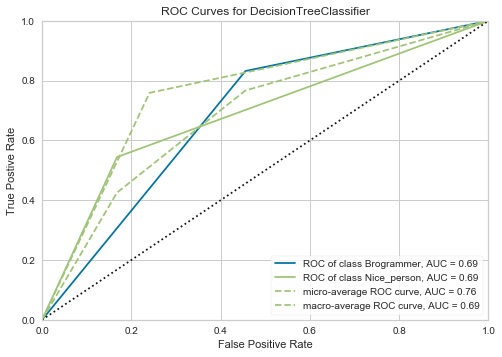

In [63]:
# Instantiate the visualizer with the classification model
visualizer = ROCAUC(clf_DT)

visualizer.score(X_test, y_test)  # Evaluate the model on the test data

visualizer.poof()    

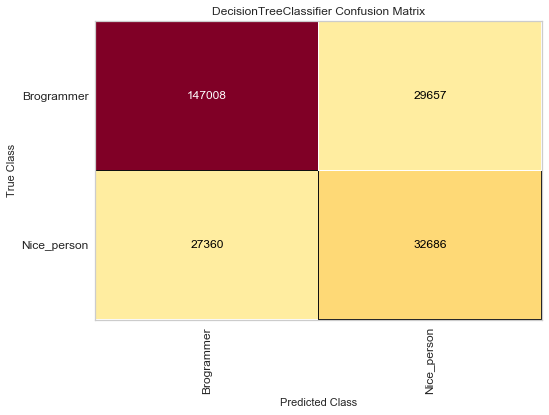

In [64]:
cm = ConfusionMatrix(clf_DT)

# To create the ConfusionMatrix, we need some test data. Score runs predict() on the data
# and then creates the confusion_matrix from scikit-learn.
cm.score(X_test, y_test)

# How did we do?
cm.poof()

In [65]:
param_grid = {
    'max_depth': [2, 5, 7, 15],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200]
}

grid_search = GridSearchCV(estimator = clf_RF, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

NameError: name 'clf_RF' is not defined

In [ ]:
# start_time = time.time()

# grid_search.fit(X_train, y_train)

# fit_time = (time.time()) - start_time
# print(f'-------{fit_time}s seconds------')

Everything everyone should have seen by now, or at least encoutered **PICKLE**



![pickle](pics/pickle.jpg)


The above CV took 90 mins to run through. Imagine it took a few hours. If I wanted to store this trained model, to use or compare with later, I can _pickle_ it to use for later.

In [ ]:
# pd.to_pickle(grid_search, "GridSeach_RF.pkl")

In [ ]:
grid_search = pd.read_pickle("GridSeach_RF.pkl")

In [ ]:
grid_search.best_params_

In [ ]:
clf_RF = (RandomForestClassifier(max_depth = 15,
                                 max_features = 3,
                                 min_samples_leaf = 3,
                                 min_samples_split = 8,
                                 n_estimators = 200))

In [ ]:
start_time = time.time()

clf_RF.fit(X_train, y_train)

fit_time = (time.time()) - start_time
print(f'-------{fit_time}s seconds------')

In [ ]:
y_hat = clf_RF.predict(X_test)

acc = accuracy_score(y_test, y_hat) * 100
print(f"Accuracy Score is {acc}")

In [ ]:
# Instantiate the visualizer with the classification model
visualizer = ROCAUC(clf_RF)

visualizer.score(X_test, y_test)  # Evaluate the model on the test data

visualizer.poof()    

In [ ]:
cm = ConfusionMatrix(clf_RF)

# To create the ConfusionMatrix, we need some test data. Score runs predict() on the data
# and then creates the confusion_matrix from scikit-learn.
cm.score(X_test, y_test)

# How did we do?
cm.poof()

Random search vs Grid Search

![grid](pics/grid.png) ![random](pics/rand.png)

___
___
___

In [ ]:
df_2 = pd.get_dummies(slimmed_df, columns = ['month', 'member_gender'])
df_2.head()

In [ ]:
target = pd.DataFrame(df_2['user_type'])
data = df_2.drop('user_type', axis = 1)

Lets check out how well balanced our target values are.

In [ ]:
target.user_type.value_counts(normalize=True)

OOOF, that is not good. Not good at all. But our "boss" wants this done, so lets at least attempt it.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data, target, stratify = target)

In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

Santity check if everything split correctly.

Lets try a baseline before altering the weights.

In [ ]:
clf_RF = RandomForestClassifier()

In [ ]:
start_time = time.time()

clf_RF.fit(X_train, y_train)

fit_time = (time.time()) - start_time
print(f'-------{fit_time}s seconds------')

In [ ]:
y_hat = clf_RF.predict(X_test)

acc = accuracy_score(y_test, y_hat) * 100
print(f"Accuracy Score is {acc}")

In [ ]:
# Instantiate the visualizer with the classification model
visualizer = ROCAUC(clf_RF)

visualizer.score(X_test, y_test)  # Evaluate the model on the test data

visualizer.poof()    

In [ ]:
cm = ConfusionMatrix(clf_RF)

# To create the ConfusionMatrix, we need some test data. Score runs predict() on the data
# and then creates the confusion_matrix from scikit-learn.
cm.score(X_test, y_test)

# How did we do?
cm.poof()

Now lets just try putting in class weights and see how it improves our scoring.

In [ ]:
clf_RF_weights = RandomForestClassifier(class_weight={'Subscriber':0.91, 'Customer':0.9})

In [ ]:
start_time = time.time()

clf_RF_weights.fit(X_train, y_train)

fit_time = (time.time()) - start_time
print(f'-------{fit_time}s seconds------')

In [ ]:
y_hat = clf_RF_weights.predict(X_test)

acc = accuracy_score(y_test, y_hat) * 100
print(f"Accuracy Score is {acc}")

In [ ]:
# Instantiate the visualizer with the classification model
visualizer = ROCAUC(clf_RF_weights)

visualizer.score(X_test, y_test)  # Evaluate the model on the test data

visualizer.poof()    

In [ ]:
cm = ConfusionMatrix(clf_RF_weights)

# To create the ConfusionMatrix, we need some test data. Score runs predict() on the data
# and then creates the confusion_matrix from scikit-learn.
cm.score(X_test, y_test)

# How did we do?
cm.poof()

___

Last Model - Multiclass Classification

In [ ]:
month_count = bike_df.month.value_counts()

In [ ]:
sns.barplot(month_count.index, month_count.values)

Visual inspection, but also getting a percentage is wise.

In [ ]:
bike_df.month.value_counts(normalize=True)

Much more balanced classes. Will this help in predicting? Lets find out....

In [ ]:
df_3 = pd.get_dummies(slimmed_df, columns = ['user_type', 'member_gender'])
df_3.head()

In [ ]:
target = df_3['month']
data = df_3.drop('month', axis=1)

In [ ]:
# from sklearn.preprocessing import LabelEncoder
# le = LabelEncoder()

# target = le.fit_transform(target)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data, target, stratify=target)

In [ ]:
clf_RF_multi = RandomForestClassifier()

In [ ]:
start_time = time.time()

clf_RF_multi.fit(X_train, y_train)

fit_time = (time.time()) - start_time
print(f'-------{fit_time}s seconds------')

In [ ]:
y_hat = clf_RF_multi.predict(X_test)

acc = accuracy_score(y_test, y_hat) * 100
print(f"Accuracy Score is {acc}")

In [ ]:
# Instantiate the visualizer with the classification model
visualizer = ROCAUC(clf_RF_multi)

visualizer.score(X_test, y_test)  # Evaluate the model on the test data

visualizer.poof()    

In [ ]:
cm = ConfusionMatrix(clf_RF_multi)

# To create the ConfusionMatrix, we need some test data. Score runs predict() on the data
# and then creates the confusion_matrix from scikit-learn.
cm.score(X_test, y_test)

# How did we do?
cm.poof()

We worked hard and yet nothing seems to be great. What could we have done differently...?